#### Discrete Simulation HW6
#### Problem 2
Authored: Austin Jetrin Maddison 6481268

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.physics.control.control_plots import matplotlib

from my_settings import *

In [7]:
def coupon2(n):
    sets = np.zeros(n, dtype=int)
    enough_sets_exist = lambda x: np.count_nonzero(x >= 2) == n

    while not enough_sets_exist(sets):
        sets[np.random.randint(0, n)] += 1

    return sets.sum()

In [8]:
np.random.seed(27)
N = 100  # trials
max_n = 300

f = np.vectorize(lambda n: coupon2(n))
ns = np.arange(0, max_n, 1)
ns_N = np.tile(ns, (N, 1))

res_a = np.apply_along_axis(f, axis=1, arr=ns_N)

In [9]:
exp_a = res_a.mean(axis=0)

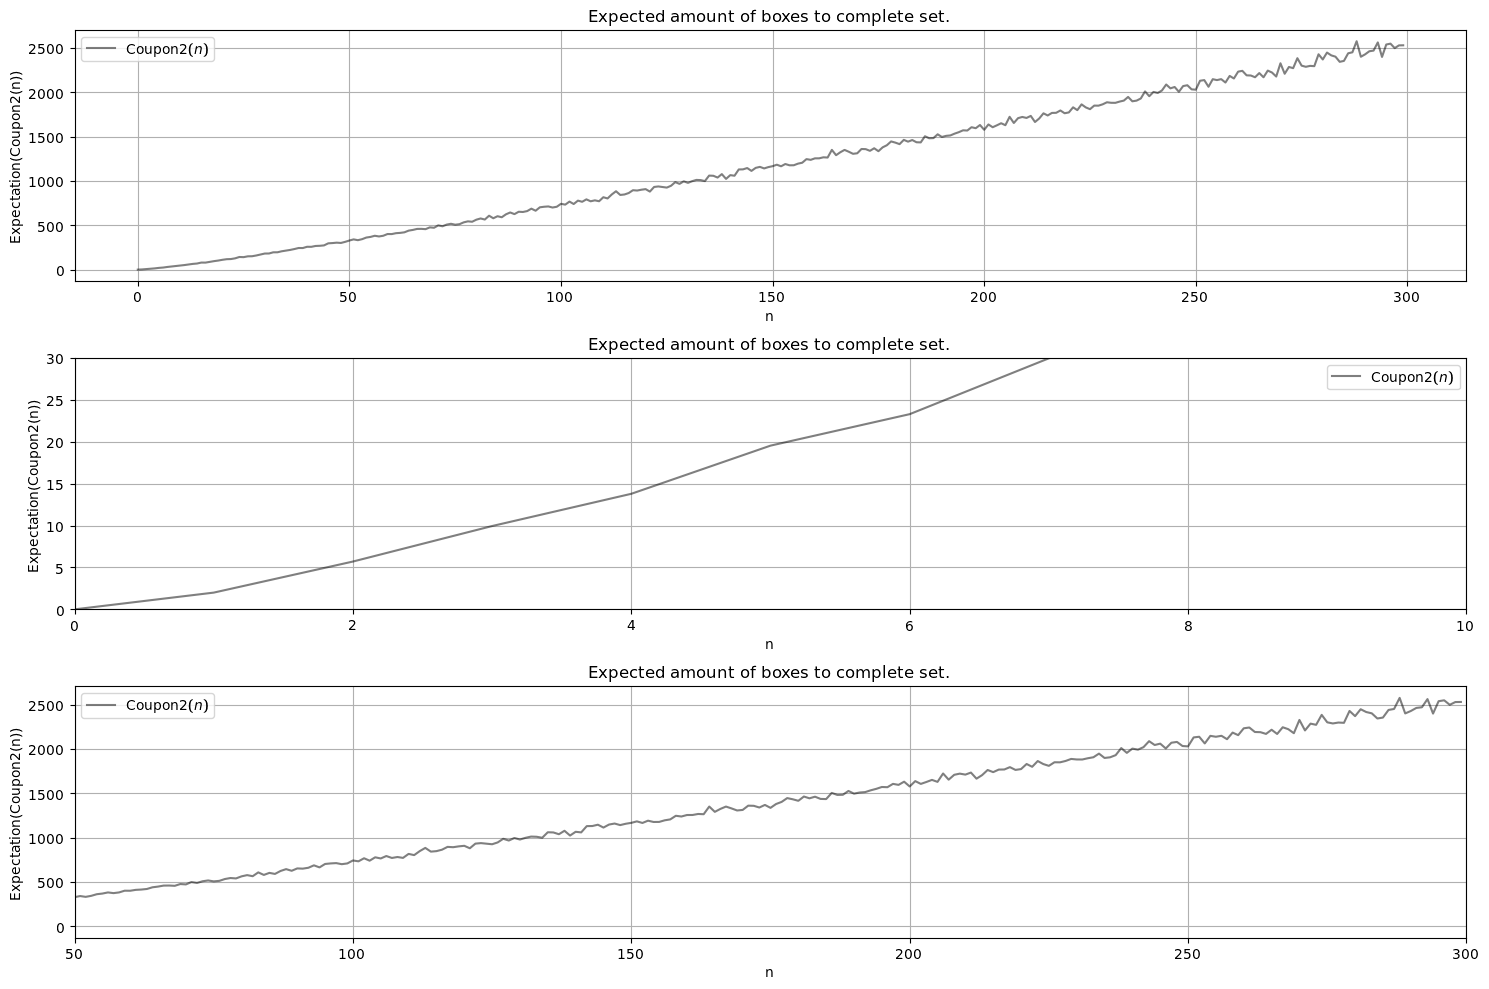

In [10]:
def plot_init(ax, xlim=None, ylim=None):
    ax.set_title("Expected amount of boxes to complete set.")
    ax.plot(ns, exp_a, label="$\\text{Coupon2}(n)$", color="k", alpha=0.5)
    ax.set_xlabel("n")
    ax.set_ylabel("Expectation(Coupon2(n))")
    ax.legend()
    ax.grid()
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)

fig, axs = plt.subplots(3, 1, figsize=(15, 10))

plot_init(axs[0])
plot_init(axs[1], xlim=(0, 10), ylim=(0, 30))
plot_init(axs[2], xlim=(50, 300))

plt.tight_layout()
plt.show()

**a.)**
The number of boxes needed to get all 2 sets of toys of size n seemed to grow exponentially for only the first few n's , but as the sets grew the number of boxes needed to open seems to grow at much slower rate, almost looks linear.

Another thing that is interesting is that as n grows the noise of the simulation's expectation seems to amplify.
This may mean that the error of the result increases as n increases. A possible solution might be is to figure out the number of trials/samples to respect to n needed to keep the results in an exceptable range over all numbers of n.

---

In [11]:
def coupon(n):
    sets = np.zeros(n, dtype=int)
    enough_sets_exist = lambda x: np.count_nonzero(x >= 1) == n

    while not enough_sets_exist(sets):
        sets[np.random.randint(0, n)] += 1

    return sets.sum()


np.random.seed(27)
N = 100  # trials
max_n = 300

f = np.vectorize(lambda n: coupon(n))
ns = np.arange(0, max_n, 1)*2
ns_N = np.tile(ns, (N, 1))

res = np.apply_along_axis(f, axis=1, arr=ns_N)
exp_b = res.mean(axis=0)

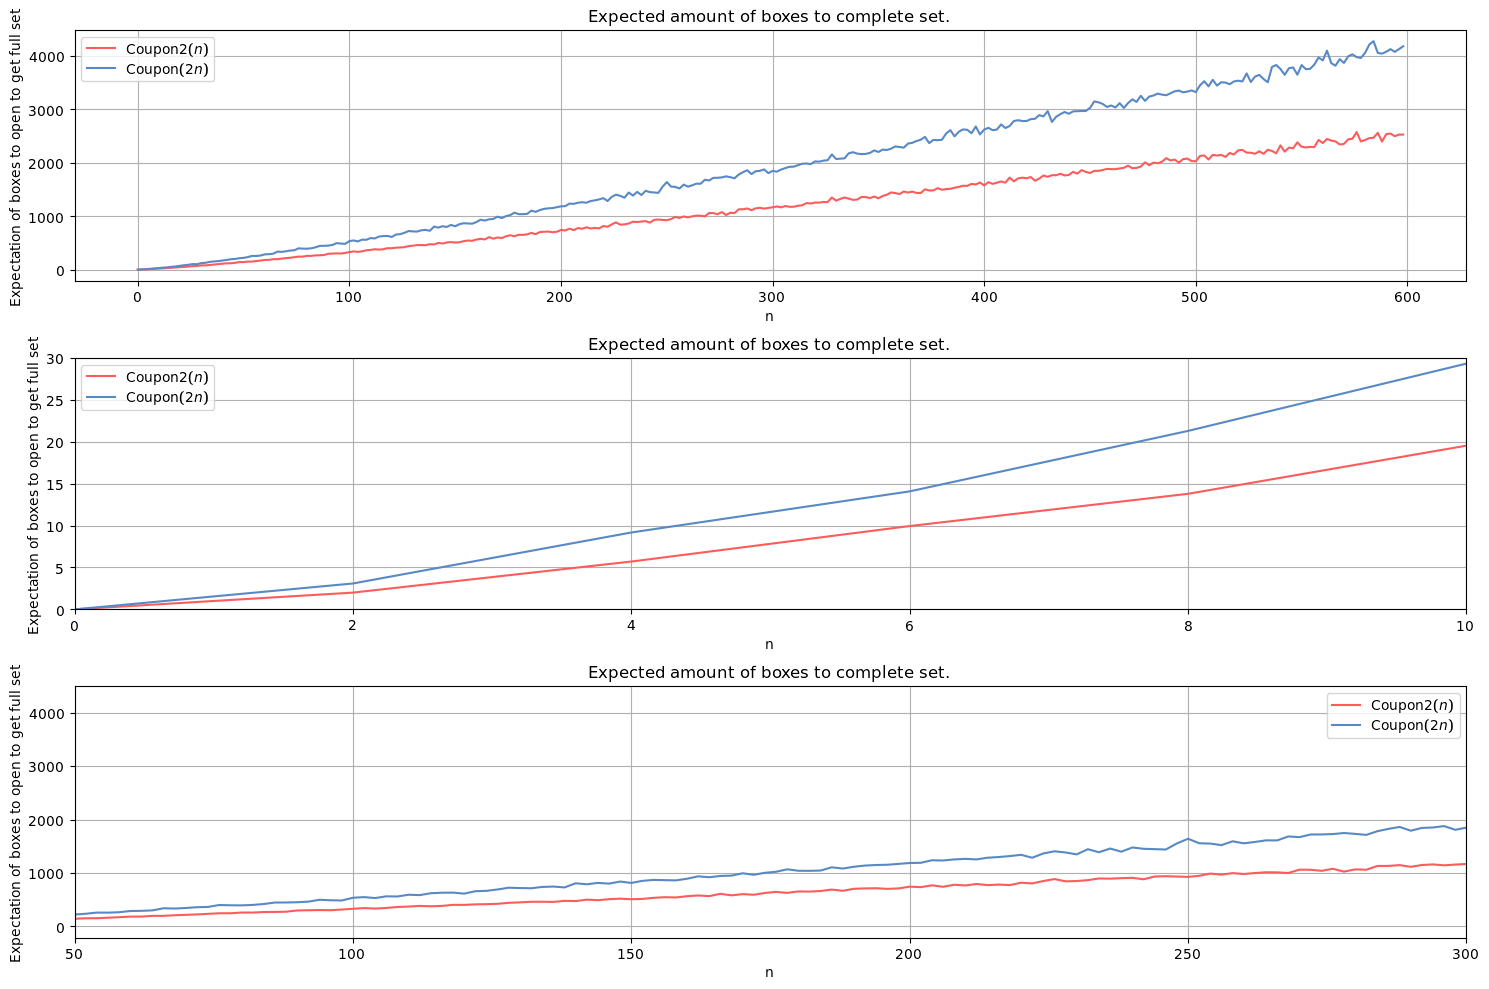

In [12]:
def plot_init(ax, xlim=None, ylim=None):
    ax.set_title("Expected amount of boxes to complete set.")
    ax.plot(ns, exp_a, label="$\\text{Coupon2}(n)$", color=(254/255,91/255,91/255), alpha=1)
    ax.plot(ns, exp_b, label="$\\text{Coupon}(2n)$", color=(88/255,137/255,198/255), alpha=1)
    ax.set_xlabel("n")
    ax.set_ylabel("Expectation of boxes to open to get full set")
    ax.legend()
    ax.grid()
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)

fig, axs = plt.subplots(3, 1, figsize=(15, 10))

plot_init(axs[0])
plot_init(axs[1], xlim=(0, 10), ylim=(0, 30))
plot_init(axs[2], xlim=(50, 300))

plt.tight_layout()
plt.show()

**b.)**

This is so very interesting. I thought maybe having 1 set of toys would take the same or less boxes to complete than having completing 2 whole sets of half of the size. The opposite is in fact true.

Also, since Coupon(2n) seems to need more boxes to be opened to get a single full set the noise of the result looks to be higher than in Coupon2(n).

---

In [13]:
def couponK(n, k):
    sets = np.zeros(n, dtype=int)
    enough_sets_exist = lambda x: (x >= k).sum() == n

    while not enough_sets_exist(sets):
        sets[np.random.randint(0, n)] += 1

    return sets.sum()

In [14]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor

N = 500  # trials
max_n = 100

ks = np.arange(1, 30+1, 5)
ns = np.arange(0, max_n+1, 5)
ns_N = np.tile(ns, (N, 1))

def compute_expectation(k):
    np.random.seed(27)
    f = np.vectorize(lambda n: couponK(n, k))
    res = np.apply_along_axis(f, axis=1, arr=ns_N)
    return res.mean(axis=0)

with ThreadPoolExecutor() as executor:
    ks_exp = list(executor.map(compute_expectation, ks))

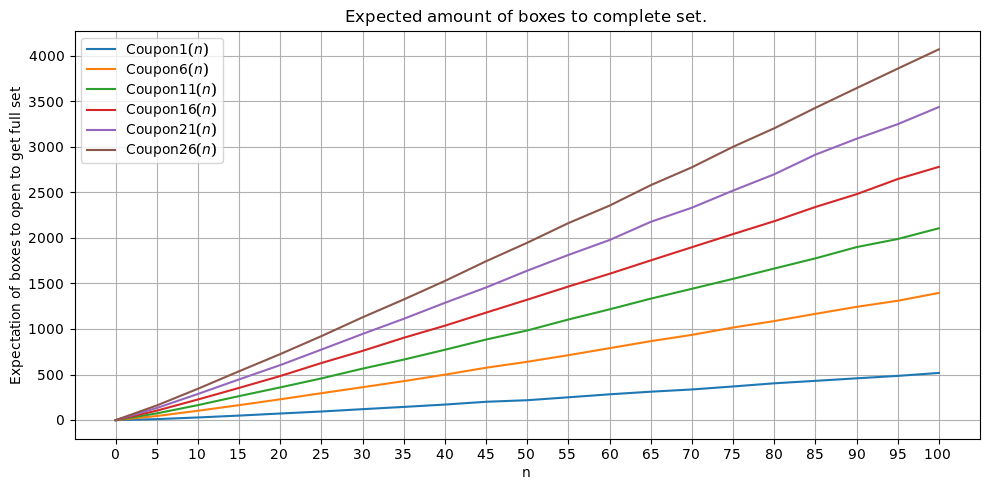

In [15]:
def plot_init(ax, xlim=None, ylim=None):
    ax.set_title("Expected amount of boxes to complete set.")

    for k, x in zip(ks,ks_exp):
        ax.plot(ns, x, label="$\\text{Coupon{"+ str(k) + "}}(n)$")

    ax.set_xlabel("n")
    ax.set_ylabel("Expectation of boxes to open to get full set")
    ax.set_xticks(ns)
    ax.legend()
    ax.grid()
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))

plot_init(axs)

plt.tight_layout()
plt.show()

Note that earlier we found that the rate of expected number boxes needed slow down dramatically as n increases. Let's try to exploiting that characteristic to approximate the expectation for general numbers of k.

From just looking at the graph above we can see that the difference in expectation for the varying k seem to follow a pattern. We could probably eye ball `Coupon31(n)`. Let's plot their differences and work from there.

In [65]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor

N = 10  # trials
max_n = 500

ks = np.arange(1, 30+1, 5)
ns = np.arange(0, max_n+1, 5)
ns_N = np.tile(ns, (N, 1))

def compute_expectation(k):
    np.random.seed(27)
    f = np.vectorize(lambda n: couponK(n, k))
    res = np.apply_along_axis(f, axis=1, arr=ns_N)
    return res.mean(axis=0)

with ThreadPoolExecutor() as executor:
    ks_exp = list(executor.map(compute_expectation, ks))

In [66]:
from scipy.optimize import curve_fit

def model_func(n, a, b, c):
    return a + b * n + c * n**2

params_k = {}

for i, k in enumerate(ks):
    E_k = ks_exp[i]
    valid_ns = ns[1:]
    valid_E_k = E_k[1:]
    params, _ = curve_fit(model_func, valid_ns, valid_E_k)
    params_k[k] = params

params_k

{1: array([-6.57779697e+01,  5.78350310e+00,  2.45956478e-03]),
 6: array([-1.10551083e+02,  1.48753560e+01,  3.18861175e-03]),
 11: array([-1.32437968e+02,  2.22122238e+01,  3.94999807e-03]),
 16: array([-9.28021899e+01,  2.84899705e+01,  5.80761492e-03]),
 21: array([-1.31001462e+02,  3.52377678e+01,  6.10091439e-03]),
 26: array([-1.65597381e+02,  4.14997655e+01,  6.93118471e-03])}

In [67]:
k_values = list(params_k.keys())
a_vals = [params_k[k][0] for k in k_values]
b_vals = [params_k[k][1] for k in k_values]
c_vals = [params_k[k][2] for k in k_values]

def linear_func(k, p1, p2):
    return p1 * k + p2

a_params, _ = curve_fit(linear_func, k_values, a_vals)
b_params, _ = curve_fit(linear_func, k_values, b_vals)
c_params, _ = curve_fit(linear_func, k_values, c_vals)

print("a", a_params)
print("b", b_params)
print("c", c_params)

a [ -2.97607095 -76.18438444]
b [1.40540739 5.71009797]
c [0.0001883  0.00219759]


In [68]:
def E_general(k, n):
    a = a_params[0] * k + a_params[1]
    b = b_params[0] * k + b_params[1]
    c = c_params[0] * k + c_params[1]
    return a + b * n + c * n**2

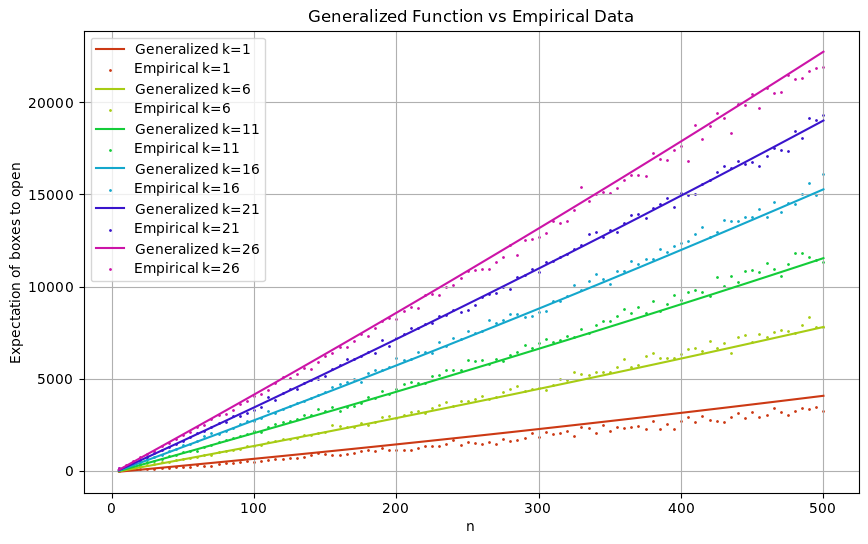

In [69]:
from matplotlib.colors import hsv_to_rgb

plt.figure(figsize=(10, 6))

# for k in np.arange(1, 30+1, 1):
#     if k in ks: continue
#     color = hsv_to_rgb((k/30.0, 0.9,0.8 ))
#     plt.plot(ns[1:], [E_general(k, n) for n in ns[1:]], '--', linewidth=0.8, color=color, alpha=0.5)


for i, k in enumerate(ks):
    E_k = ks_exp[i]
    color = hsv_to_rgb((k/30.0, 0.9,0.8 ))
    plt.plot(ns[1:], [E_general(k, n) for n in ns[1:]], '-', label=f"Generalized k={k}", color = color)
    plt.scatter(ns[1:], E_k[1:], label=f"Empirical k={k}", color = color, s=1)

plt.xlabel("n")
plt.ylabel("Expectation of boxes to open")
plt.title("Generalized Function vs Empirical Data")
plt.legend()
plt.grid()
plt.show()

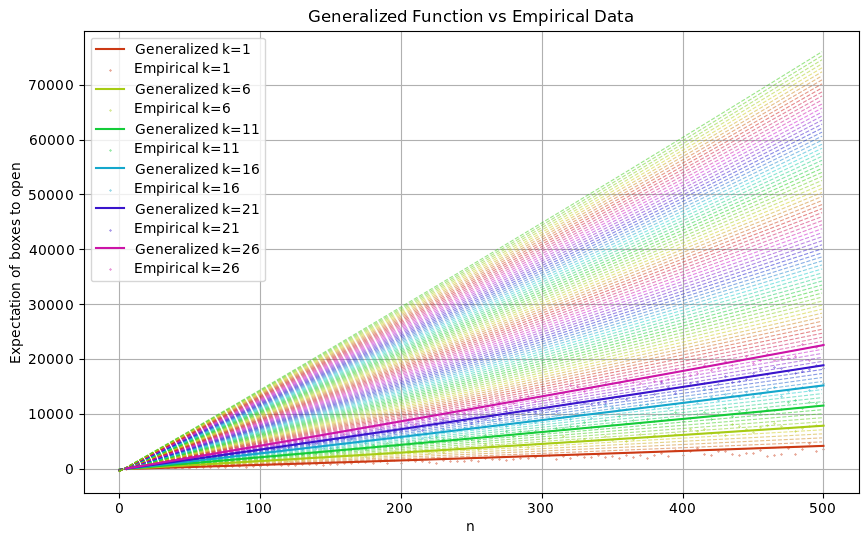

In [42]:
from matplotlib.colors import hsv_to_rgb

plt.figure(figsize=(10, 6))

for k in np.arange(1, 100, 1):
    # if k in ks: continue
    color = hsv_to_rgb((k/30.0 % 1.0, 0.9,0.8 ))
    plt.plot(np.arange(500), [E_general(k, n) for n in np.arange(500)], '--', linewidth=0.8, color=color, alpha=0.5)


for i, k in enumerate(ks):
    E_k = ks_exp[i]
    color = hsv_to_rgb((k/30.0, 0.9,0.8 ))
    plt.plot(ns[1:], [E_general(k, n) for n in ns[1:]], '-', label=f"Generalized k={k}", color = color)
    plt.scatter(ns[1:], E_k[1:], label=f"Empirical k={k}", color=color, s=0.1)

plt.xlabel("n")
plt.ylabel("Expectation of boxes to open")
plt.title("Generalized Function vs Empirical Data")
plt.legend()
plt.grid()
plt.show()

Here you can see the varying k's on the generalized function varyying as the dotted lines.

In [45]:
import numpy as np

N = 3 # trials
max_n = 2000

ns = np.arange(0, max_n+1, 5)
ns_N = np.tile(ns, (N, 1))

np.random.seed(27)
f = np.vectorize(lambda n: couponK(n, 6))
res = np.apply_along_axis(f, axis=1, arr=ns_N)
exp_2 = res.mean(axis=0)

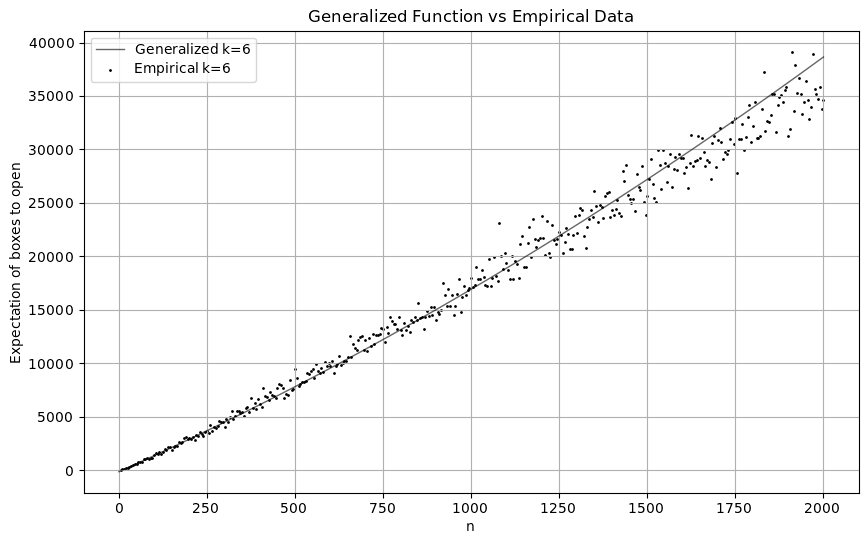

In [46]:
plt.figure(figsize=(10, 6))

plt.plot(ns, [E_general(6, n) for n in ns], '-', linewidth=1, color='k', alpha=0.6, label=f"Generalized k={6}")
plt.scatter(ns[1:], exp_2[1:], label=f"Empirical k={6}", color='k', s=1)


plt.xlabel("n")
plt.ylabel("Expectation of boxes to open")
plt.title("Generalized Function vs Empirical Data")
plt.legend()
plt.grid()
plt.show()

I settled on curve fitting to generalize the coupon function expectation. I went down a few rabbit holes before coming to this, I tried getting the ratio and the difference between the ks and fit a curve that fits the change of ration from the last k to the next. It didn't quite work so I decided just to do somthing a bit more naive. Hence settling on just curve fitting the emperical results.